<a href="https://colab.research.google.com/github/joaojulio/StudyProjects/blob/master/Alura_quarentenadados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Previous Exploration

##Exploração prévia

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [3]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
filmes.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [7]:
avaliacoes.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [8]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [33]:
avaliacoes.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [21]:
avaliacoes[avaliacoes['movieId']==1].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [22]:
avaliacoes.query('movieId==1').head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [23]:
avaliacoes[avaliacoes['movieId']==1].describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [31]:
avaliacoes[(avaliacoes['movieId']==1) & (avaliacoes['rating']==0.5)]['userId'].count()

1

In [32]:
avaliacoes[(avaliacoes['movieId']==1) & (avaliacoes['rating']==5.0)]['userId'].count()

47

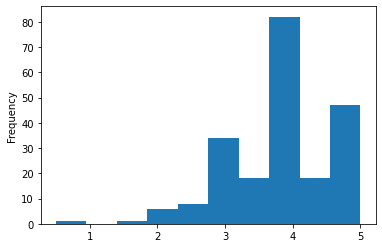

In [40]:
avaliacoes[avaliacoes['movieId']==1]['rating'].plot(kind='hist')

In [49]:
rating_avg = avaliacoes.groupby('movieId')['rating'].mean()
rating_avg

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [0]:
movie_rated = filmes.join(rating_avg, on='movieId')

In [51]:
movie_rated.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
movie_rated = movie_rated.rename(columns={'rating':'rating_avg'})

In [65]:
movie_rated.columns

Index(['movieId', 'title', 'genres', 'rating_avg'], dtype='object')

## Data Exploration

## Exploração dos dados

In [66]:
movie_rated['rating_avg'].isnull().sum()

18

In [69]:
total_rates = avaliacoes.groupby('movieId')['rating'].sum()
total_rates

movieId
1         843.0
2         377.5
3         169.5
4          16.5
5         150.5
          ...  
193581      4.0
193583      3.5
193585      3.5
193587      3.5
193609      4.0
Name: rating, Length: 9724, dtype: float64

In [0]:
movie_rated = movie_rated.join(total_rates, on='movieId')

In [0]:
movie_rate = movie_rated.rename(columns={'rating':'total_rates'})

In [76]:
movie_rate.columns

Index(['movieId', 'title', 'genres', 'rating_avg', 'total_rates'], dtype='object')